<a href="https://colab.research.google.com/github/vishwajeet-hogale/IPO-rep/blob/main/restaurant_scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install geopandas
!pip install bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
import geopandas 
output_notebook()

In [37]:
df = pd.read_csv("Restaurant.csv")

In [38]:
df

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,82207,Mathilde French Bistro,315 05th St,San Francisco,CA,94107,NaN,NaN,NaN,NaN,82207_20171031,10/31/2017 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,95229,95229 Outta Here Cheesesteak,24 Willie Mays Pl View Lvl Sect 318,San Francisco,CA,94107,NaN,NaN,NaN,1.415078e+10,95229_20180326,03/26/2018 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3129,Francisca Club,595 Sutter St,San Francisco,CA,94102,37.789014,-122.409967,POINT (-122.409967 37.789014),NaN,3129_20170803,08-03-2017 00:00,NaN,Non-inspection site visit,NaN,NaN,NaN,19.0,19.0,6.0,3.0,21.0
3,99788,ACAI R,1130 Ocean Ave,San Francisco,CA,94112,NaN,NaN,NaN,1.415584e+10,99788_20190530,05/30/2019 12:00:00 AM,78.0,Routine - Unscheduled,99788_20190530_103153,Inadequate dressing rooms or improper storage ...,Low Risk,NaN,NaN,NaN,NaN,NaN
4,88508,McDonald's,5454 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,88508_20190626,06/26/2019 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,96202,Soma Eats 2,121 Spear St,San Francisco,CA,94105,NaN,NaN,NaN,NaN,96202_20190408,04-08-2019 00:00,85.0,Routine - Unscheduled,96202_20190408_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN
53969,65396,Carmelina's Cafe,1855 Folsom St,San Francisco,CA,94103,37.767664,-122.415456,POINT (-122.415456 37.767664),NaN,65396_20170127,01/27/2017 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,53.0,53.0,3.0,2.0,20.0
53970,64835,Jane,2123 Fillmore St,San Francisco,CA,94115,37.789404,-122.433954,POINT (-122.433954 37.789404),NaN,64835_20161205,12-05-2016 00:00,NaN,Reinspection/Followup,NaN,NaN,NaN,102.0,102.0,4.0,6.0,30.0
53971,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,POINT (-122.420493 37.755282),NaN,1000_20180608,06-08-2018 00:00,NaN,Reinspection/Followup,NaN,NaN,NaN,53.0,53.0,3.0,2.0,20.0


In [39]:
df.columns

Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_location', 'business_phone_number',
       'inspection_id', 'inspection_date', 'inspection_score',
       'inspection_type', 'violation_id', 'violation_description',
       'risk_category', 'Neighborhoods', 'SF Find Neighborhoods',
       'Current Police Districts', 'Current Supervisor Districts',
       'Analysis Neighborhoods'],
      dtype='object')

In [40]:
# Visualize the number of distinct businesses
df.business_id.nunique()

6253

In [69]:
df.isna().sum()

business_id                         0
business_name                       0
business_address                    0
business_city                       0
business_state                      0
business_postal_code             1186
business_latitude               26498
business_longitude              26498
business_location               26513
business_phone_number           36301
inspection_id                       0
inspection_date                     0
inspection_score                14432
inspection_type                     0
violation_id                    13720
violation_description           13720
risk_category                   13720
Neighborhoods                   26538
SF Find Neighborhoods           26538
Current Police Districts        26526
Current Supervisor Districts    26526
Analysis Neighborhoods          26526
dtype: int64

In [71]:
df.inspection_score.isna().value_counts()

False    39541
True     14432
Name: inspection_score, dtype: int64

In [73]:
df.groupby(df.risk_category).count()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
risk_category,,,,,,,,,,,,,,,,,,,,,
High Risk,5825,5825,5825,5825,5825,5707,3074,3074,3074,1924,5825,5825,5339,5825,5825,5825,3072,3072,3073,3073,3073
Low Risk,19112,19112,19112,19112,19112,18698,10491,10491,10488,6219,19112,19112,17822,19112,19112,19112,10482,10482,10486,10486,10486
Moderate Risk,15316,15316,15316,15316,15316,15044,8113,8113,8113,4925,15316,15316,14309,15316,15316,15316,8103,8103,8108,8108,8108


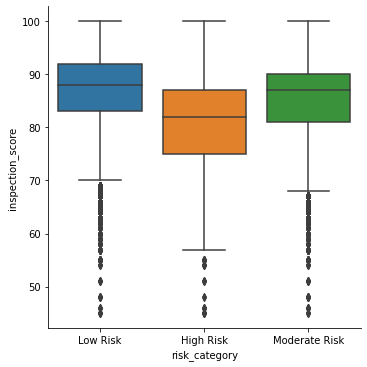

In [74]:
sns.catplot(x="risk_category", y="inspection_score",kind='box' ,data=df);

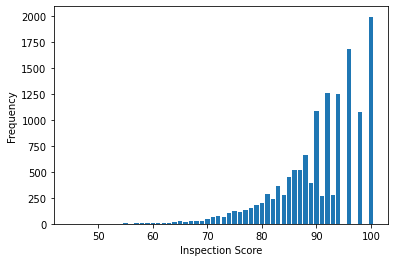

In [41]:
# Visualize the distribution of inspection scores
# Count unique inspection ID's since each violation is a different row
score_distribution = df.groupby('inspection_score', as_index=False).agg({'inspection_id':'nunique'}).rename({'inspection_id': 'count'}, axis=1)
plt.bar(score_distribution.inspection_score, score_distribution['count'])
plt.xlabel('Inspection Score')
plt.ylabel('Frequency')
plt.show();

In [42]:
# get the newest data on number of restaurants with high risks violations
new_high_risk = df[(df['inspection_date'] == df['inspection_date'].iloc[-1]) & (df['risk_category'] == 'High Risk')]

# number of inspections
print("Number of inspections overall:", df['inspection_id'].nunique())

# newest inpsection with high risks
print("Latest inspections:", df['inspection_date'].iloc[-1], ", Number of restaurants with high risk violations: ", new_high_risk['business_id'].nunique())

Number of inspections overall: 26663
Latest inspections: 07/20/2018 12:00:00 AM , Number of restaurants with high risk violations:  2


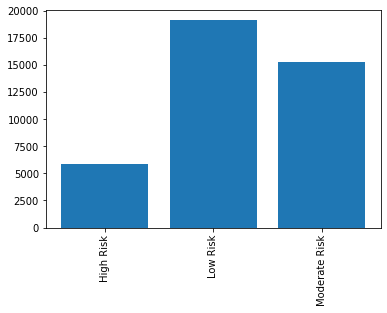

In [43]:
# Visualize 
rsn = df.groupby("risk_category").size()
lth = range(len(rsn))
plt.bar(lth, rsn)
plt.xticks(lth, rsn.index, rotation=90)
plt.show()


In [49]:
data = df

In [50]:
#violation rate
num_isp = len(data["inspection_id"])
num_vio = len(data["violation_id"])-len(data["violation_id"][data["violation_id"].isnull()])
vio_rate = num_vio / num_isp
print("Violation Rate")
print(vio_rate)

Violation Rate
0.7457988253385952


In [52]:
#average inspection score
avg_score = data["inspection_score"].mean()
print("Average Score")
print(avg_score)

Average Score
86.22166864773273


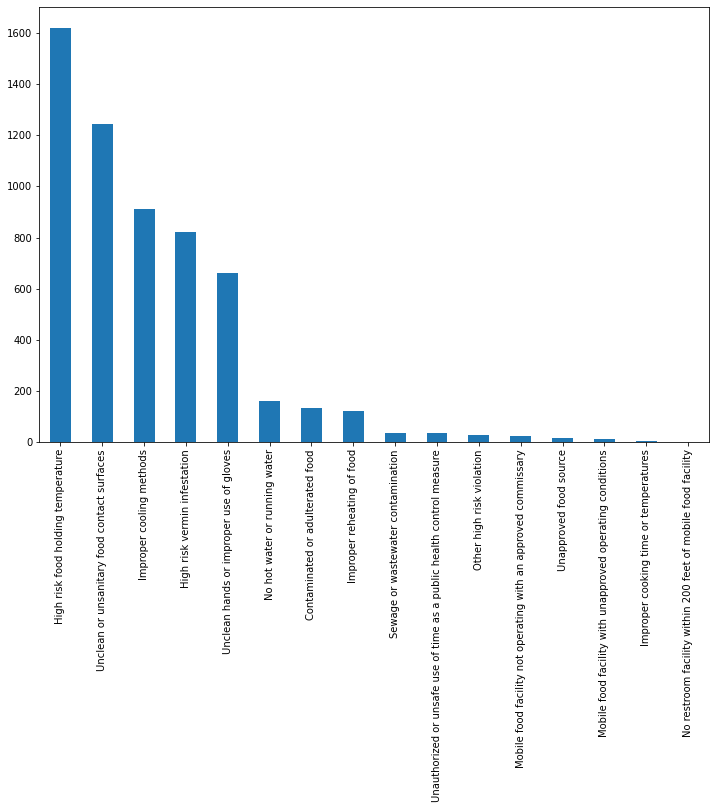

In [55]:
data_high = data[data["risk_category"] == "High Risk"]
fig, ax = plt.subplots(1, figsize=(12,8))
data_2018_high["violation_description"].value_counts().plot(kind='bar', ax=ax)